## K-Means Clustering

By Rama Vempati

To connect with or follow me on LinkedIn [Click Here](https://www.linkedin.com/in/ramavempati/)

### What is Clustering?

Clustering - A typical and well-known type of unsupervised learning. Clustering algorithms try to find natural groupings in data. Similar data points (according to some notion of similarity) are considered in the same group. We call these groups clusters.

Once algorithm is run and groups are determined, any new data can be easily assigned to the correct group

Clsutering in general can be used for any type of grouping. Some examples of use cases are:

* Behavioral segmentation:
    - Segment by purchase history
    - Segment by activities on application, website, or platform
    - Define personas based on interests
    - Create profiles based on activity monitoring
* Inventory categorization:
    - Group inventory by sales activity
    - Group inventory by manufacturing metrics
    - Sorting sensor measurements:
* Detect activity types in motion sensors
    - Group images
    - Separate audio
    - Identify groups in health monitoring
* Detecting bots or anomalies:
    - Separate valid activity groups from bots
    - Group valid activity to clean up outlier detection


### What is K-Means Clustering

K-Means clustering is a simple and widely-used clustering algorithm. Given value of k , it tries to build k clusters from samples in the dataset.

### How does it work?

Below are 4 simple steps
1. Input K and set of points x<sub>1</sub>, x<sub>2</sub>, x<sub>3</sub>.....x<sub>n</sub>
2. Place or start with some K centroids at random locations, c<sub>1</sub>, c<sub>2</sub>, c<sub>3</sub>.....c<sub>k</sub>
3. Repeat below until convergence
    * For each point x<sub>i</sub>
        - find nearest centroid c<sub>j</sub>
        - assign the point x<sub>i</sub> to cluster J
    * For each cluster J = 1....K
        - new centroid c<sub>j</sub> = mean of all points x<sub>i</sub> in that cluster
        - assign to cluster J in previous step
4. Stop when none of the cluster assignments change

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn
from pprint import pprint
np.random.seed(sum(map(ord, "aesthetics")))
seaborn.set_context('notebook')

### Example - 1

Although k-means clustering can be applied to data in higher dimensions, we will walk through the following examples using a simple two-dimensional dataset for the purpose of visualization.

Generate some random samples (blobs) - basically generates random samples X, y with 3 clusters (centers parameter) also making it fairly easy to spot the clusters, note the cluster_std parameter (The standard deviation of the clusters)

In [2]:
from sklearn.datasets.samples_generator import make_blobs

X, y = make_blobs(n_samples=300, 
                  n_features=2, 
                  centers=3, 
                  random_state=0, 
                  cluster_std=0.60, 
                  shuffle=True)

print(X.shape, y.shape)

(300, 2) (300,)


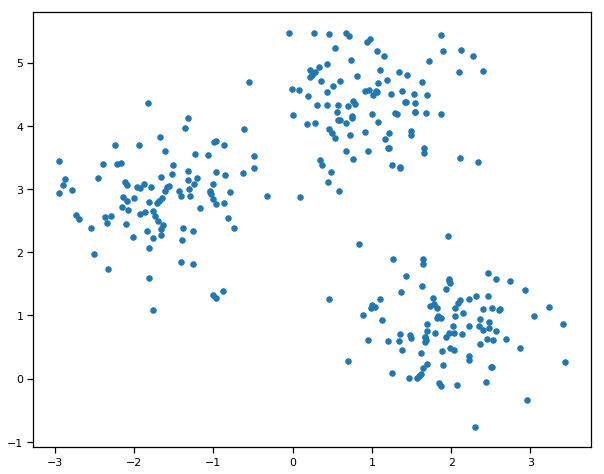

In [3]:
# y can take values 0,1,2 for 3 clusters but we're going to ignore y for the time being
# Visualizing the blobs as a scatter plot
plt.figure(figsize = (10, 8))
plt.scatter(X[:, 0], X[:, 1], s=30, cmap=plt.cm.Paired);

The dataset that we just created consists of 300 randomly generated points that are roughly grouped into three regions with higher density, which is visualized via a two-dimensional scatterplot.

Now let us do below steps.
1. Randomly pick k centroids from the sample points as initial cluster centers.
2. Assign each sample to the nearest centroid $μ^{j}$ , j belongs to {1,…, k}.
3. Move the centroids to the center of the samples that were assigned to it.
4. Repeat steps 2 and 3 until the cluster assignments do not change or a user-defined tolerance or maximum number of iterations is reached

In [4]:
from sklearn.cluster import KMeans

# number of clusters to predict 3
ktest = KMeans(n_clusters=3, 
               init='random', 
               n_init=10, 
               max_iter=300, 
               tol=1e-04, 
               random_state=0)

# fitting the model to X 
ktest.fit(X)

# predicting labels (y) and saving to y_pred
y_pred = ktest.predict(X)

Using the preceding code, we set the number of desired clusters to 3; specifying the number of clusters a priori is one of the limitations of k-means. 

We set n_init=10 to run the k-means clustering algorithms 10 times independently with different random centroids to choose the final model as the one with the lowest SSE. 

Via the max_iter parameter, we specify the maximum number of iterations for each single run (here it is 300). Note that the k-means implementation in scikit-learn stops early if it converges before the maximum number of iterations is reached. However, it is possible that k-means does not reach convergence for a particular run, which can be problematic (computationally expensive) if we choose relatively large values for max_iter. One way to deal with convergence problems is to choose larger values for tol, which is a parameter that controls the tolerance with regard to the changes in the withincluster sum-squared-error to declare convergence. In the preceding code, we chose a
tolerance of 1e-04 (=0.0001).

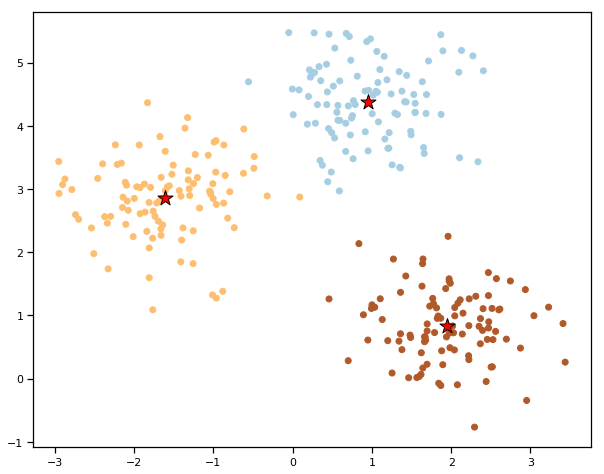

In [5]:
# Plotting predicted labels as a scatter
plt.figure(figsize = (10,8))
plt.scatter(X[:,0], X[:,1], c=y_pred, cmap=plt.cm.Paired)
plt.scatter(ktest.cluster_centers_[:, 0],
            ktest.cluster_centers_[:, 1],
            s=250, marker='*',
            c='red', edgecolor='black',
            label='centroids')
plt.show()

#### How about finding 4 clusters instead of 3?

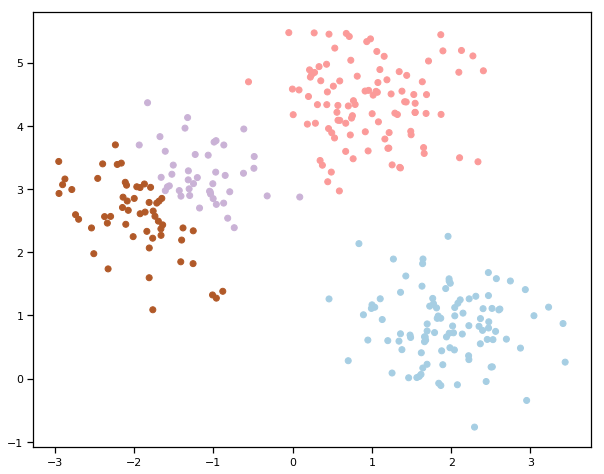

In [6]:
ktest = KMeans(n_clusters=4) 
ktest.fit(X) #fitting the model to X
y_pred = ktest.predict(X) #predicting labels (y) and saving to y_pred

#Plotting predicted labels as a scatter
plt.figure(figsize = (10,8))
plt.scatter(X[:,0], X[:,1], c=y_pred, cmap=plt.cm.Paired)
plt.show()

#### Changing maximum iterations to 100 instead of default 300

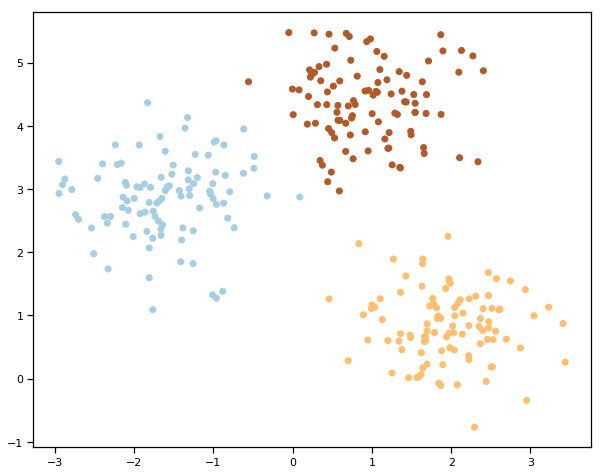

In [7]:
ktest = KMeans(n_clusters=3, max_iter=100) #number of clusters to predict 3
ktest.fit(X) #fitting the model to X
y_pred = ktest.predict(X) #predicting labels (y) and saving to y_pred

#Plotting predicted labels as a scatter
plt.figure(figsize = (10,8))
plt.scatter(X[:,0], X[:,1], c=y_pred, cmap=plt.cm.Paired)
plt.show()

#### Change the cluster_std parameter to make the points non separable

(300, 2) (300,)


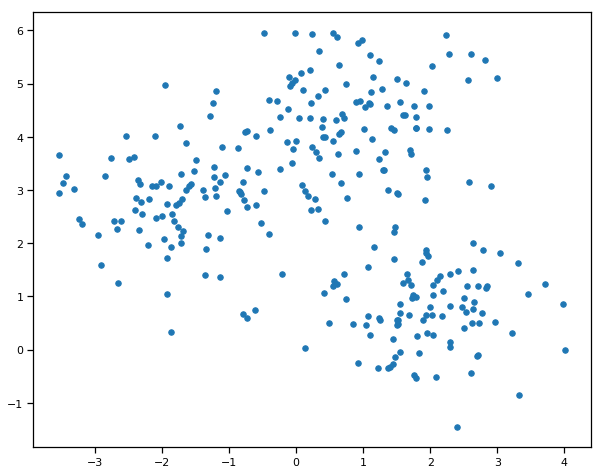

In [8]:
X, y = make_blobs(n_samples=300, centers=3, random_state=0, cluster_std=0.85)
print(X.shape, y.shape) #y can take values 0,1,2 for 3 clusters but we're going to ignore y for the time being

# Visualizing the blobs as a scatter plot
plt.figure(figsize = (10,8))
plt.scatter(X[:, 0], X[:, 1], s=30, cmap=plt.cm.Paired)
plt.show()

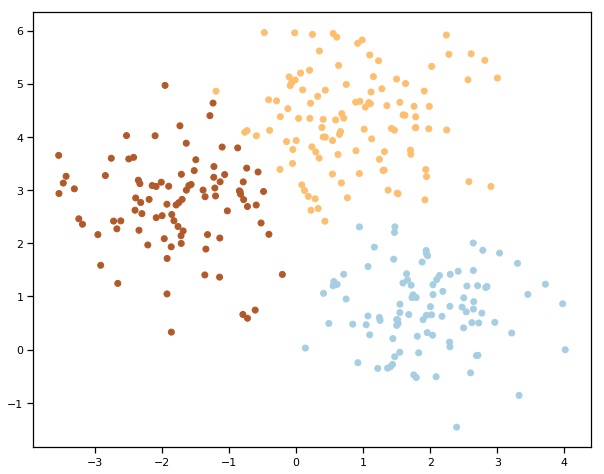

In [9]:
ktest = KMeans(n_clusters=3, max_iter=100) #number of clusters to predict 3 
ktest.fit(X) #fitting the model to X
y_pred = ktest.predict(X) #predicting labels (y) and saving to y_pred

#Plotting predicted labels as a scatter plot
plt.figure(figsize = (10,8))
plt.scatter(X[:,0], X[:,1], c=y_pred, cmap=plt.cm.Paired)
plt.show()

Although k-means worked well on this toy dataset, we shall highlight drawbacks of k-means: 

1. We have to specify the number of clusters, k, a priori. The number of clusters to choose may not always be so obvious in real-world applications, especially if we are working with a higher dimensional dataset that cannot be visualized. 
2. The other properties of k-means are that clusters do not overlap and are not hierarchical, and we also assume that there is at least one item in each cluster

Though above assumptions and drawbacks are not addressed, by using kmeans++ (instad of kmeans) we can greatly improve the clustering results through more clever seeding of the initial cluster centers.

The classic k-means algorithm that uses a random seed to place the initial centroids, which can sometimes result in bad clusterings or slow convergence if the initial centroids are chosen poorly. One way to address this issue is to run the k-means algorithm multiple times on a dataset and choose the best performing model in terms of the SSE. 

Another strategy is to place the initial centroids far away from each other via the k-means++ algorithm, which
leads to better and more consistent results than the classic k-means.

To use k-means++ with scikit-learn's KMeans object, we just need to set the init parameter to 'k-means++'. In fact, 'k-means++' is the default argument to the init parameter, which is strongly recommended in practice.

We will run the same code from above using default init parameter.

In [10]:
# number of clusters to predict 3
ktest = KMeans(n_clusters=3, 
               ##init='random', 
               n_init=10, 
               max_iter=300, 
               tol=1e-04, 
               random_state=0)

# fitting the model to X 
ktest.fit(X)

# predicting labels (y) and saving to y_pred
y_pred = ktest.predict(X)

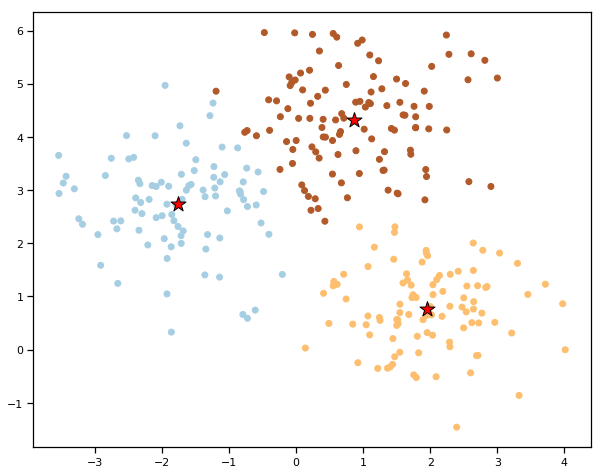

In [11]:
# Plotting predicted labels as a scatter
plt.figure(figsize = (10,8))
plt.scatter(X[:,0], X[:,1], c=y_pred, cmap=plt.cm.Paired)
plt.scatter(ktest.cluster_centers_[:, 0],
            ktest.cluster_centers_[:, 1],
            s=250, marker='*',
            c='red', edgecolor='black',
            label='centroids')
plt.show()

One of the main challenges in unsupervised learning is that we do not know the definitive answer. We don't have the ground truth class labels in our dataset that allow us to apply the techniques like Hyperparameter Tuning, in order to evaluate the performance of a supervised model. Thus, to quantify the quality of clustering, we need to use
intrinsic metrics—such as the within-cluster SSE (distortion) to compare the performance of different k-means clusterings.

Conveniently, we don't need to compute the within-cluster SSE explicitly when we are using scikit-learn, as it is already accessible via the inertia_ attribute after fitting a KMeans model:

In [12]:
print('Distortion: %.2f' % ktest.inertia_)

Distortion: 409.33


#### Elbow method to determine optimal number of clusters

Based on the within-cluster SSE, we can use a graphical tool, the so-called elbow method, to estimate the optimal number of clusters k for a given task. Intuitively, we can say that, if k increases, the distortion will decrease. This is because the samples will be closer to the centroids they are assigned to. The idea behind the elbow method is to identify the value of k where the distortion begins to increase most rapidly, which will become clearer if we plot the distortion for different values of k:

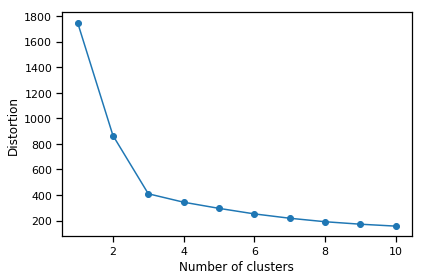

In [13]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

As we can see in the following plot, the elbow is located at k=3, which is evidence that k=3 is indeed a good choice for this dataset

### Comparison of models on other metrics - Silhouette Score

**Silhouette Score:** The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. The Silhouette Coefficient for a sample is (b - a) / max(a, b). To clarify, b is the distance between a sample and the nearest cluster that the sample is not a part of. Note that Silhouette Coefficient is only defined if number of labels is 2 <= n_labels <= n_samples - 1.

sklearn.metrics.silhouette_score(X, labels, *, metric='euclidean', sample_size=None, random_state=None, **kwds)

This function returns the mean Silhouette Coefficient over all samples. To obtain the values for each sample, use silhouette_samples.

The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.

### Putting it in simple words

To calculate the silhouette coefficient of a single sample in our dataset, we can apply the following three steps:

1. Calculate the cluster cohesion $a^{(i)}$ as the average distance between a sample $x^{(i)}$ and all other points in the same cluster.
2. Calculate the cluster separation $b^{(i)}$ from the next closest cluster as the average distance between the sample $x^{(i)}$ and all samples in the nearest cluster.
3. Calculate the silhouette $s^{(i)}$ as the difference between cluster cohesion and separation divided by the greater of the two, as shown here:

$\pmb S^{(i)} = \bigg ( \frac{b^{(i)}-a^{(i)}}{max of {b^{(i)}, a^{(i)}}} \bigg)$

The silhouette coefficient is bounded in the range -1 to 1. 

Based on the preceding equation, we can see that the silhouette coefficient is 0 if the cluster separation and cohesion are equal $b^{(i)} = a^{(i)}$ . 

Furthermore, we get close to an ideal silhouette coefficient of 1 if $b^{(i)} >> a^{(i)}$ , since $b^{(i)}$ quantifies how dissimilar a sample is to other clusters, and $a^{(i)}$ tells us how similar it is to the other samples in its own cluster.

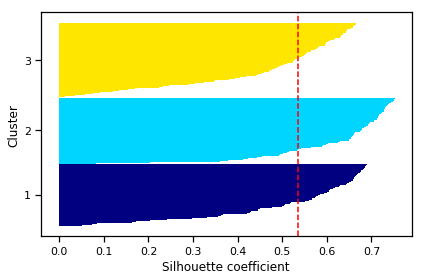

In [14]:
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples

km = KMeans(n_clusters=3, 
            init='k-means++', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km = km.fit_predict(X)

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
plt.show()

### Example of a bad clustering

In order to demonstrate the bad clustering, let us take number of clusters as 2

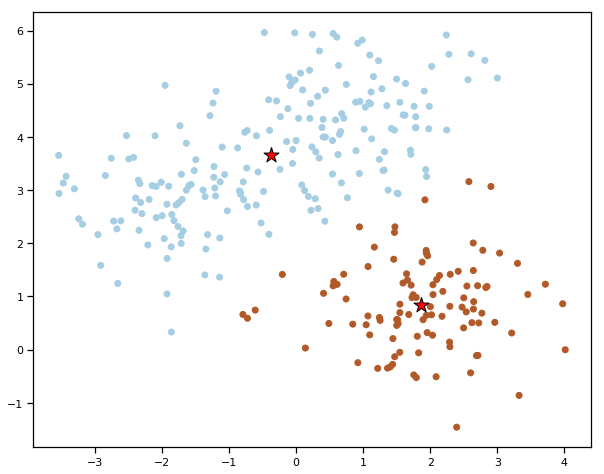

In [15]:
ktest = KMeans(n_clusters=2,
            init='k-means++',
            n_init=10,
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km = ktest.fit_predict(X)

# Plotting predicted labels as a scatter
plt.figure(figsize = (10,8))
plt.scatter(X[:,0], X[:,1], c=y_km, cmap=plt.cm.Paired)
plt.scatter(ktest.cluster_centers_[:, 0],
            ktest.cluster_centers_[:, 1],
            s=250, marker='*',
            c='red', edgecolor='black',
            label='centroids')
plt.show()

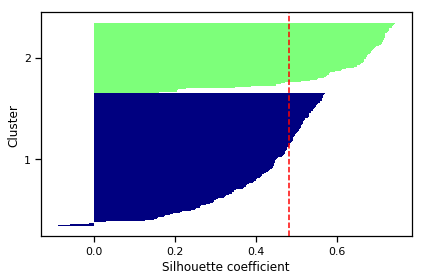

In [16]:
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
plt.show()